<a href="https://colab.research.google.com/github/lexisantos/lintatpromptgamma/blob/main/HPGe_PGflux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
import Activacion as act
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

##Paths generales

Es importante el orden y definir bien los nombres en el caso de `path_incog_{iso}`.

In [156]:
#Espectros de fondo según detector y r_is
path_fondo = {'DF-OFF': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/DF_fondo_rOFF_12.06.2025.txt",
              'XC-OFF': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_fondo_rOFF_12.06.2025.txt",
              'DF-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/DF_fondo_rON_10.06.2025.txt",
              'XC-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_fondo_rON_10.06.2025.txt"}

#Nombre de la fuente patrón
Fuente_pat = 'Eu152_76044A-440'

#Espectros de Eu en .txt
path_Eu152 = {'DF-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/DF_Eu152_76044A_sep3_rON_11.06.2025.txt",
              'XC-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_Eu152_76044A_3sep_rON_11.06.2025.txt",
              'XC-OFF': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_Eu152_76044A_3sep_rOFF_12.06.2025.txt"}

#Tablas de ROIs en .txt [E, inicio, fin]
path_Roical = {'DF-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/ROI_cal_DF_Eu152_rON.txt",
               'XC-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/ROI_cal_XC_Eu152_rON.txt",
               'XC-OFF': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/ROI_cal_XC_Eu152_rOFF.txt"}

#Fuentes de Cs y Co según detector y r_is
fuente_Cs = {'DF-ON': 'Cs137_76072-440',
          'XC-ON': 'Cs137_76072-440',
          'XC-OFF': 'Cs137_76071-440'}

fuente_Co = {f:'Co60_76057-440' for f in ['DF-ON', 'XC-ON', 'XC-OFF']}

#Espectros de Cs=incog y Co=incog_Co en .txt
path_incog_Cs = {'DF-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/DF_Cs137_76072_sep3_rON_11.06.2025.txt",
              'XC-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_Cs137_76072_3sep_rON_11.06.2025.txt",
              'XC-OFF': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_Cs137_76071_3sep_rOFF_12.06.2025.txt"}

ROIs_Cs = {'DF-ON': np.array([1160, 1174]),
          'XC-ON': np.array([1108, 1122]),
          'XC-OFF': np.array([1109, 1121])}

path_incog_Co = {'DF-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/DF_Co60_76057_sep3_rON_11.06.2025.txt",
                 'XC-OFF': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_Co60_76057_3sep_rOFF_12.06.2025.txt",
                 'XC-ON': "/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_Co60_76057_3sep_rON_11.06.2025.txt"}

ROIs_Co = {'DF-ON': np.array([[2370, 2388], [2082, 2100]]),
           'XC-ON': np.array([[1992, 2006], [2268, 2282]]),
           'XC-OFF': np.array([[1993, 2007], [2268, 2282]])}


In [157]:
class bydet:
  def __init__(self, det):
    self.det = det

  def fondo(self, paths, graph = False):
    # Store the result of act.fromspec in self.fondo
    self.fondo = act.fromspec(paths[self.det])
    self.cps_fondo = {}
    self.fondo_ROIs = {}

    if graph:
      plt.figure()
      plt.plot(self.fondo.channels, self.fondo.counts)
      plt.grid(True, ls='--')
      plt.xlabel('Channel')
      plt.ylabel('Counts')
      plt.yscale('log')
      plt.title(f'Fondo {self.det}')

  def eff(self, ROI_cal_paths, spec_cal_paths, Fuente_pat: str = 'Eu152_76044A-440'):
    ROIs_cal = np.loadtxt(ROI_cal_paths[self.det])
    spec_Eu = act.fromspec(spec_cal_paths[self.det])
    self.spec_cal = spec_Eu

    Fecha_cal = datetime.strptime(spec_cal_paths[self.det][-14:-4], '%d.%m.%Y')
    datos_cal = act.NAA_calib(Fuente_pat, Fecha_cal)
    self.fuente_pat = Fuente_pat

    self.eff_Epeak_Eu = ROIs_cal[:, 0]
    ROIs_cal = ROIs_cal[:, 1:].astype(int)

    eff_data, err_eff = datos_cal.cal_eff(ROIs_cal, self.spec_cal, self.fondo, criterio = 0.003, only_data = True)
    self.eff_data = eff_data
    self.eff_err = err_eff
    self.npicos = {Fuente_pat.split('_')[0]: len(err_eff)}

  def   eff_ext(self, n_new, npicos = {'137Cs': 1, '60Co': 2}, path_name: str = 'path_incog_'):
    self.npicos.update(npicos)
    for f in npicos:
      Comp_incog = {f: 1}
      Incog = act.Alambre(Comp_incog, 0)
      ROIs = globals()[f'ROIs_{f[-2:]}'][self.det]
      # Access the ROI method on self.fondo
      self.fondo_ROIs[f] = [self.fondo.ROI(ROIs)] if ROIs.shape == (2,) else [self.fondo.ROI(roi) for roi in ROIs]
      self.cps_fondo[f] = [np.array([back[xx] for xx in ['net', 'net_err']])/self.fondo.tlive for back in self.fondo_ROIs[f]]

      spec_incog = act.fromspec(globals()[f'{path_name}{f[-2:]}'][self.det], coef_en = self.spec_cal.coef_en[::-1])
      pico_incog = [spec_incog.ROI(ROIs)] if ROIs.shape == (2,) else [spec_incog.ROI(roi) for roi in ROIs]
      E_incog = [pico_incog[ii]['en_max'] for ii in range(npicos[f])] #energía del pico
      t_inicio = spec_incog.tinicio.replace(hour=0, minute=0, second=0, microsecond=0) #Fecha de espectro '00 hs'

      setattr(self, f'cps_pico_{f[-2:]}', np.array([np.array([pico_incog[ii]['net'], pico_incog[ii]['net_err']])/spec_incog.tlive - self.cps_fondo[f][ii] for ii in range(npicos[f])]))
      cps_pico = getattr(self, f'cps_pico_{f[-2:]}')
      data_act = act.Actividad(np.array(E_incog), np.array([cps_pico[:, 0]]), np.array([cps_pico[:, 1]]),
                          spec_incog.treal, self.eff_coef_tabla, isfromRA3=True, Fuente=globals()[f'fuente_{f[-2:]}'][det], dt = t_inicio,
                          var_mu = self.eff_var_mu)
      df_act = pd.DataFrame(np.hstack((data_act[3], data_act[0].reshape((npicos[f], 2)), np.array(data_act[2]).reshape((npicos[f], 1)))),
                            columns = ['Energy [keV]', 'BR %', 'BR err %', 'Act [Bq]', 'Error Act [Bq]', 'Diff Tab %'])
      df_act[['BR %', 'BR err %']] = df_act[['BR %', 'BR err %']]*100

      setattr(self, f'data_act_{f[-2:]}', df_act)
      setattr(self, f'data_RA3_{f[-2:]}', data_act[1])

      eff_incog = cps_pico[:, 0]/(data_act[1][0]*data_act[3][0][1])
      eff_incog_err = eff_incog*np.sqrt((data_act[3][:, 2]/data_act[3][:, 1])**2 +
                        (cps_pico[:, 1]/cps_pico[:, 0])**2 +
                        np.divide(*data_act[1][::-1])**2)

      self.eff_data = np.append(self.eff_data, eff_incog)
      self.eff_err = np.append(self.eff_err, eff_incog_err)
      self.eff_Epeak_Eu = np.append(self.eff_Epeak_Eu, E_incog)

  def fit_eff(self, grado, graph = True):
    coef, coef_err, chi2, residual, pvalor, ddof, rhos, var_mus = act.ajuste_pol(grado, np.log(self.eff_Epeak_Eu), np.log(self.eff_data), self.eff_err/self.eff_data)

    self.eff_coef_tabla = np.vstack((coef, coef_err)).T
    self.eff_residuos = residual
    ss_res = np.sum(residual**2)
    ss_tot = np.sum((np.log(self.eff_data)-np.mean(np.log(self.eff_data)))**2)
    R2 = 1 - (ss_res / ss_tot)
    self.eff_goodness = pd.DataFrame(np.array([chi2, pvalor, ddof, R2]), index = ['chi^2', 'p-value', 'ddof', 'R^2'], columns = ['goodness of fit'])
    self.eff_var_mu = var_mus
    self.eff_rhos = rhos

    if graph:
      E_arr = np.linspace(self.eff_Epeak_Eu.min(), self.eff_Epeak_Eu.max(), num=1000)
      logE_arr  = np.log(E_arr)
      eff_eval = np.polyval(coef, logE_arr)
      sigma_mu_est = np.sqrt(var_mus(logE_arr))
      i0 = 0
      plt.figure(figsize = (5,5))
      for dd in self.npicos:
        i1 = self.npicos[dd] + i0
        plt.errorbar(np.log(self.eff_Epeak_Eu[i0:i1]), np.log(self.eff_data)[i0:i1], yerr= self.eff_err[i0:i1]/self.eff_data[i0:i1], fmt='.', label = f'{dd}')
        i0 = i1
      plt.plot(logE_arr, eff_eval, 'tab:gray', linewidth = 2.0, label = 'Model Fit')
      plt.fill_between(logE_arr, eff_eval-sigma_mu_est, eff_eval+sigma_mu_est, color='tab:gray', alpha=0.2)
      plt.grid(True, ls = '--')
      plt.ylabel('$ln$ Eff')
      plt.xlabel('$ln$ E')
      plt.legend()
      plt.title('Eficiencia para ' + f'{det}'+ ' 3sep ' + 'Fit grado= {}'.format(grado))# + f'{Fecha_cal.date()}')
      plt.tight_layout()

#DF-ON (Mn203/1 y Mn209/1)

Defino el detector que elijo con `det` y cargo todas las funciones para calcular fondos y la eficiencia.

In [158]:
det = 'DF-ON'
data_dfon = bydet(det)

## Fondo
A partir de `data_dfon`, sólo basta darle como input el dict con los paths de fondos.

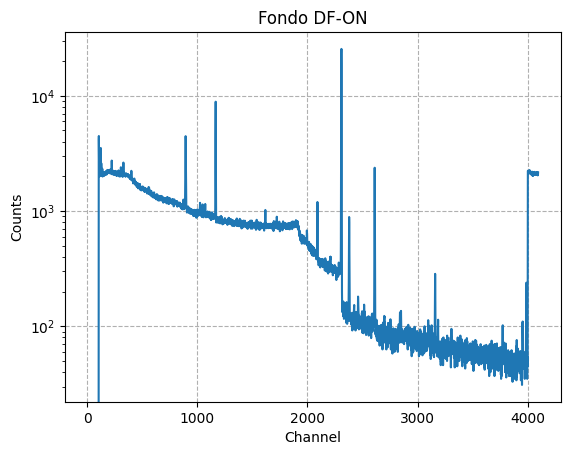

In [159]:
data_dfon.fondo(path_fondo, graph = True)

## Eficiencia

Cargo las eficiencias en función de los paths de los espectros de la fuente patrón -`path_Eu152`-, y una lista con los ROIs -`path_Roical`-.

In [160]:
data_dfon.eff(path_Roical, path_Eu152)

### Ajuste a curva de eficiencia

Ajusto con los datos sólo del espectro de Eu152.

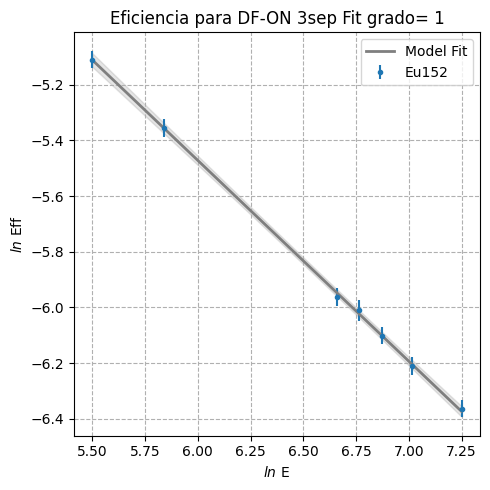

In [161]:
data_dfon.fit_eff(grado = 1, graph = True)

### Reporte Eficiencia

La bondad del ajuste puede obtenerse por el método `eff_goodness`. Los residuos se pueden ver con el método `eff_residuos`. Los coeficientes están en la tabla de `eff_coef_tabla`, siendo la ec. lineal  $ln{\text{Eff}} = a_1\cdot ln{E} + a_0$.

In [162]:
data_dfon.eff_goodness

,goodness of fit
chi^2,0.587312
p-value,0.988577
ddof,5.000000
R^2,0.999487


In [163]:
print('Coeficientes: \n')
pd.DataFrame(data_dfon.eff_coef_tabla, columns = ['mean', 'error'], index = ['a1', 'a0'])

Coeficientes: 



,mean,error
a1,-0.720753,0.020196
a0,-1.147574,0.132733


In [164]:
print('Residuos:', data_dfon.eff_residuos)

Residuos: [ 0.00190941  0.00237362 -0.01667752  0.01441133 -0.00086856 -0.00797871
  0.00995931]


##Picos incógnita - Agregar nuevos puntos

Puedo **agregar los picos de otras fuentes a la curva de eficiencia** (desde la actividad tabulada por el RA-3). Para esto indico la cantidad de nuevos puntos con `n_new`, y el nro de picos por fuente, `npicos`.

Es importante que el nombre de los paths de las distintas fuentes tenga el mismo título al principio, y que al final se especifique  (por ejemplo, `path_incog_Co` y `path_incog_Cs`).

In [165]:
data_dfon.eff_ext(n_new = 3, npicos = {'60Co': 2, '137Cs': 1})

La actividad calculada (**método *fuente incógnita***) usando la eficiencia anterior queda guardada, en caso de que se quiera comparar con la tabulada.

In [166]:
data_dfon.data_act_Co

,Energy [keV],BR %,BR err %,Act [Bq],Error Act [Bq],Diff Tab %
0,1332.492,99.9826,0.0006,18383.624418,354.603175,0.570325
1,1173.228,99.8500,0.0300,18380.082007,323.656523,0.551054


In [168]:
print('Respecto a los datos tabulados desde el Lab del RA3:\n', *act.redondeo(*data_dfon.data_RA3_Co, cs = 3, texto = True), 'Bq')

Respecto a los datos tabulados desde el Lab del RA3:
 18280 ± 548 Bq


In [169]:
data_dfon.data_act_Cs

,Energy [keV],BR %,BR err %,Act [Bq],Error Act [Bq],Diff Tab %
0,661.657,85.1,0.2,127935.642651,1823.41017,0.824352


In [170]:
print('Respecto a los datos tabulados desde el Lab del RA3:\n', *act.redondeo(*data_dfon.data_RA3_Cs, cs = 3, texto = True), 'Bq')

Respecto a los datos tabulados desde el Lab del RA3:
 126900 ± 3810 Bq


**En caso de querer agregar fuentes del mismo isótopo, con distinta activada, medidas en un mismo detector (por ej., Cs137_76072-440 y Cs137_76071-440 en 'DF-ON'), hacer de un paso a la vez**. Por ejemplo:



```
# data_dfon.eff_ext(n_new = 3, npicos = {'137Cs': 1}, path_name = 'path_add1_')
# data_dfon.eff_ext(n_new = 3, npicos = {'137Cs': 1}, path_name = 'path_add2_')
```

para el que al principio se definen `path_add1_Cs = {'DF-ON': ...}` y `path_add2_Cs = {'DF-ON': ...}`.


##Ajuste con nuevos puntos de eficiencia

Ajuste con nuevos datos. Se usa el mismo método de antes, ya que los datos en `eff_data` y `eff_err` se renuevan en el paso anterior.

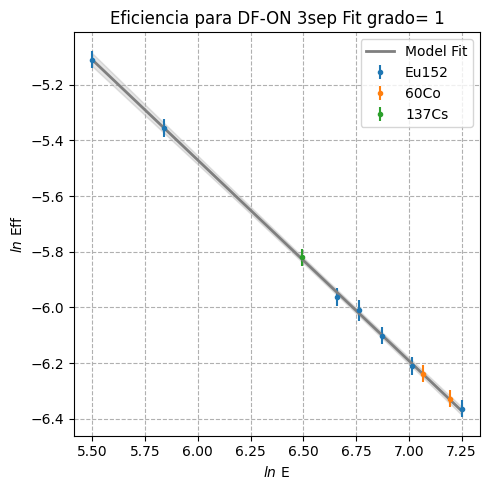

In [171]:
data_dfon.fit_eff(grado = 1, graph = True)

In [172]:
data_dfon.eff_goodness

,goodness of fit
chi^2,0.664459
p-value,0.999610
ddof,8.000000
R^2,0.999539


In [173]:
print('Coeficientes: \n')
pd.DataFrame(data_dfon.eff_coef_tabla, columns = ['mean', 'error'], index = ['a1', 'a0'])

Coeficientes: 



,mean,error
a1,-0.719737,0.018122
a0,-1.152505,0.121206


In [174]:
print('Residuos:', data_dfon.eff_residuos)

Residuos: [ 0.00125082  0.00136803 -0.01851287  0.01246663 -0.00292067 -0.01017598
  0.00752224  0.00294121  0.00147175  0.00643907]


##Espectros de hojuelas MnCu

Sólo lo hago una vez, así me queda guardado:

In [ ]:
#Dicts que me van guardar la info de todos los alambres en cada corrida
cps_Alambres = {}
Act_Alambres = {}
dts = {}
tdead = {}

Empiezo iterando a partir de acá. Al finald el bloque anterior pueden encontrarse los coefs de eficiencia, y los




In [ ]:
#Composición del alambre
Composition = {'55Mn': 0.8123, '63Cu': 0.1877}

#Tiempo de irradiación total
tirr = 16200 + 696

#Defino la clase de alambre con sus métodos
Alambres = act.Alambre(Composition, tirr)

#Regiones de interés sacadas del espectro (GammaVision). El background es 3 puntos
ROIs = {'56Mn': [1494, 1508]}#, '64Cu': [885, 903]}

#Nombre del alambre y nro de medición
alambre = 'Mn209'
medno = 1

Tasa de fondo (cps_ROIs) en la ROI del pico de '56Mn' (*mat* en *ROIs*). Se lo agrega al dict de Fondos.

In [ ]:
#Obtengo info de los fondos en las ROIs de interés, y calculo sus tasas
Fondo_ROIs[alambre] = {iso: Fondo.ROI(ROIs[iso]) for iso in ROIs}
cps_ROIs = {mat:np.array([Fondo_ROIs[alambre][mat][xx] for xx in ['net', 'net_err']])/Fondo.tlive for mat in ROIs}

#Corresponde al tiempo de fin de la irradiación
t_inicio = datetime(2025, 6, 11, 14, 41, 36)

#función para el path del espectro del alambre (Chequear fecha. En general funciona a menos que el job haya arrancado al día siguiente)
path_job = lambda alambre, nro: f"/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/DF_{alambre}_sep3_rON_{t_inicio.date().strftime('%d.%m.%Y')}_med{nro}.txt"


Inicio nuevos parámetros para iniciar el cálculo de tasas del alambre.

In [ ]:
#Arrays con ceros para a tasa y actividad del alambre
id_med = [mat+f'_med{medno}' for mat in ROIs]
cps_Alambres[alambre] = {id:np.zeros(2) for id in id_med}
Act_Alambres[alambre] = {id:np.zeros(2) for id in id_med}

#Obtengo el espectro del alambre
data = act.fromspec(path_job(alambre, medno), spec_cal.coef_en[::-1])

#Intervalo desde que se dejó de irradiar hasta que se empezó a medir (td o tdelay)
dt = (data.tinicio - t_inicio).total_seconds()

#Señalo las regiones de interés en channels
idx = np.array(list(ROIs.values())).reshape(-1)
idx_roiMn = np.logical_and(data.channels> idx[0], data.channels<idx[1])

##Si se quiere agregar el del Cu:
#idx_roiCu = np.logical_and(data.channels> idx[2], data.channels< idx[3])

Grafico el espectro cerca del pico de interés.

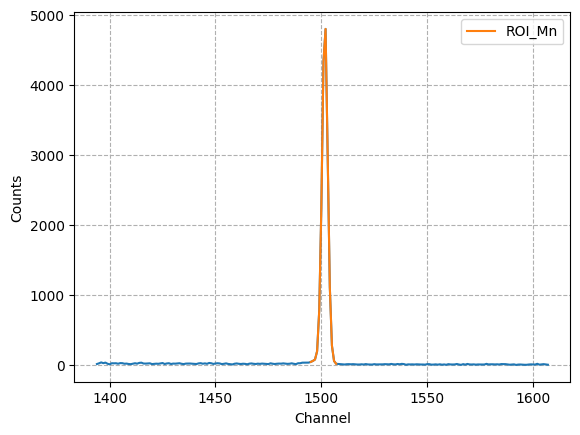

In [ ]:
#Figuras de espectros destacando las ROIs
plt.figure()
plt.plot(data.channels[min(idx)-100:max(idx)+100], data.counts[min(idx)-100:max(idx)+100])
plt.plot(data.channels[idx_roiMn], data.counts[idx_roiMn], label = 'ROI_Mn')
#plt.plot(data.channels[idx_roiCu], data.counts[idx_roiCu], label = 'ROI_Cu')
plt.grid(True, ls='--')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.legend()
#plt.yscale('log')

Cálculo a partir de las tasas y la eficiencia del HPGe.

In [ ]:
#Cálculo de actividad a partir de sus tasas
for mat, id in zip(ROIs, id_med):
  data_ROI = data.ROI(ROIs[mat])
  Net_cps, Err_cps = (data_ROI['net']/data.tlive - cps_ROIs[mat][0], np.sqrt((data_ROI['net_err']/data.tlive)**2 + cps_ROIs[mat][1]**2))
  cps_Alambres[alambre][id] = [Net_cps, Err_cps]
  Act_Alambres[alambre][id] = Alambres.Act_alambre(mat, np.array([data_ROI['en_max']]), np.array([Net_cps]), Err_cps, dt, data.treal, coef_tabla, rhos[0][0])[0]

#También me guardo el td para cada medición, así como el tiempo muerto en porcentaje.
dts[alambre] = dt
tdead[alambre] = 100*(1 - data.tlive/data.treal)

Actividad para este alambre:

In [ ]:
Act_Alambres

{'Mn209': {'56Mn_med1': array([76509.08196078,  1051.78368243])}}

#XC-OFF (Mn209/1 y Mn209/2)

Vuelvo a repetir las mismas funciones. El procedimiento es el mismo. No grafico la eficiencia intermedia (sólo Eu152), sino al final luego de agregar los puntos de las incógnitas.

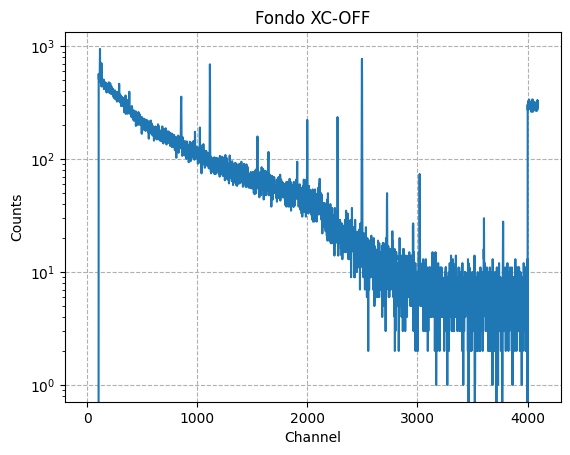

In [177]:
det = 'XC-OFF'
data_xcoff = bydet(det)
data_xcoff.fondo(path_fondo, graph = True)
data_xcoff.eff(path_Roical, path_Eu152)
data_xcoff.fit_eff(grado = 1, graph = False)
data_xcoff.eff_ext(n_new = 3, npicos = {'60Co': 2, '137Cs': 1})

In [182]:
data_xcoff.data_act_Co

,Energy [keV],BR %,BR err %,Act [Bq],Error Act [Bq],Diff Tab %
0,1173.228,99.8500,0.0300,18906.639365,306.377882,3.410543
1,1332.492,99.9826,0.0006,19169.079501,343.734625,4.788497


In [181]:
data_xcoff.data_act_Cs

,Energy [keV],BR %,BR err %,Act [Bq],Error Act [Bq],Diff Tab %
0,661.657,85.1,0.2,25413.933416,325.435201,0.440549


In [ ]:
data_dfon.fit_eff(grado = 1, graph = True)

In [ ]:
data_dfon.eff_goodness

,goodness of fit
chi^2,0.664459
p-value,0.999610
ddof,8.000000
R^2,0.999539


In [ ]:
print('Coeficientes: \n')
pd.DataFrame(data_dfon.eff_coef_tabla, columns = ['mean', 'error'], index = ['a1', 'a0'])

Coeficientes: 



,mean,error
a1,-0.719737,0.018122
a0,-1.152505,0.121206


In [ ]:
print('Residuos:', data_dfon.eff_residuos)

Residuos: [ 0.00125082  0.00136803 -0.01851287  0.01246663 -0.00292067 -0.01017598
  0.00752224  0.00294121  0.00147175  0.00643907]


##Espectros de hojuelas MnCu

Empiezo iterando a partir de acá. Al finald el bloque anterior pueden encontrarse los coefs de eficiencia, y los




In [ ]:
#Composición del alambre
Composition = {'55Mn': 0.8123, '63Cu': 0.1877}

#Tiempo de irradiación total
tirr = 16200 + 696

#Defino la clase de alambre con sus métodos
Alambres = act.Alambre(Composition, tirr)

#Regiones de interés sacadas del espectro (GammaVision). El background es 3 puntos
ROIs = {'56Mn': [1427, 1443]}#, '64Cu': [885, 903]}

#Nombre del alambre y nro de medición
alambre = 'Mn209'
medno = 2

Tasa de fondo (cps_ROIs) en la ROI del pico de '56Mn' (*mat* en *ROIs*). Se lo agrega al dict de Fondos.

In [ ]:
#Obtengo info de los fondos en las ROIs de interés, y calculo sus tasas
Fondo_ROIs[alambre] = {iso: Fondo.ROI(ROIs[iso]) for iso in ROIs}
cps_ROIs = {mat:np.array([Fondo_ROIs[alambre][mat][xx] for xx in ['net', 'net_err']])/Fondo.tlive for mat in ROIs}

#Corresponde al tiempo de fin de la irradiación
t_inicio = datetime(2025, 6, 11, 14, 41, 36)

#función para el path del espectro del alambre (Chequear fecha. En general funciona a menos que el job haya arrancado al día siguiente)
path_job = lambda alambre, nro: f"/content/drive/MyDrive/Colab Notebooks/ProyectoLINTatPromptGamma/2025-06-11_NAAPG_Beam/11.06.2025_PG_LINT/-txt/XC_{alambre}_3sep_rOFF_12.06.2025_med{nro}.txt"


Inicio nuevos parámetros para iniciar el cálculo de tasas del alambre.

In [ ]:
#Nueva etiqueta para las mediciones de XC-OFF
id_med = [mat+f'_med{medno}' for mat in ROIs]

#Obtengo el espectro del alambre
data = act.fromspec(path_job(alambre, medno), spec_cal.coef_en[::-1])

#Intervalo desde que se dejó de irradiar hasta que se empezó a medir (td o tdelay)
dt = (data.tinicio - t_inicio).total_seconds()

#Señalo las regiones de interés en channels
idx = np.array(list(ROIs.values())).reshape(-1)
idx_roiMn = np.logical_and(data.channels> idx[0], data.channels<idx[1])

##Si se quiere agregar el del Cu:
#idx_roiCu = np.logical_and(data.channels> idx[2], data.channels< idx[3])

Grafico el espectro cerca del pico de interés.

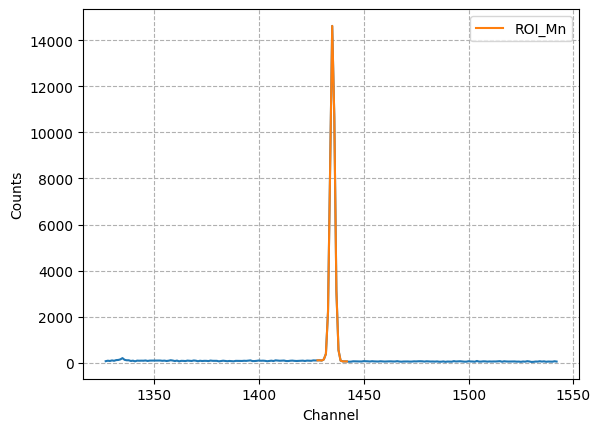

In [ ]:
#Figuras de espectros destacando las ROIs
plt.figure()
plt.plot(data.channels[min(idx)-100:max(idx)+100], data.counts[min(idx)-100:max(idx)+100])
plt.plot(data.channels[idx_roiMn], data.counts[idx_roiMn], label = 'ROI_Mn')
#plt.plot(data.channels[idx_roiCu], data.counts[idx_roiCu], label = 'ROI_Cu')
plt.grid(True, ls='--')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.legend()
#plt.yscale('log')

Cálculo a partir de las tasas y la eficiencia del HPGe.

In [ ]:
#Cálculo de actividad a partir de sus tasas
for mat, id in zip(ROIs, id_med):
  data_ROI = data.ROI(ROIs[mat])
  Net_cps, Err_cps = (data_ROI['net']/data.tlive - cps_ROIs[mat][0], np.sqrt((data_ROI['net_err']/data.tlive)**2 + cps_ROIs[mat][1]**2))
  cps_Alambres[alambre][id] = [Net_cps, Err_cps]
  Act_Alambres[alambre][id] = Alambres.Act_alambre(mat, np.array([data_ROI['en_max']]), np.array([Net_cps]), Err_cps, dt, data.treal, coef_tabla, rhos[0][0])[0]

#También me guardo el td para cada medición, así como el tiempo muerto en porcentaje.
dts[alambre] = dt
tdead[alambre] = 100*(1 - data.tlive/data.treal)

In [ ]:
Act_Alambres

{'Mn209': {'56Mn_med1': array([76509.08196078,  1051.78368243]),
  '56Mn_med2': array([78516.44758794,   970.03357247])}}

## Todas las Eff. juntas

En cada iteración, para los distintos *det*, me anoto los coeficientes que devuelve, junto con los datos para ajustar. Esto último resultará útil para volver a obtener la función *var_mu*, para propagar errores.

In [ ]:
data_all = {'XC-OFF': np.array([[0.00535819, 0.0035099 , 0.00130789, 0.00114144, 0.00103678,
       0.00086166, 0.00068793, 0.00162549, 0.00084879, 0.00073996], [1.64535220e-04, 1.08878750e-04, 4.08842089e-05, 3.92106096e-05,
       3.21669832e-05, 2.70564795e-05, 2.12418135e-05, 4.93445304e-05,
       4.92079614e-05, 4.92465919e-05]]).T,
            'XC-ON': np.array([[0.00534794, 0.00351262, 0.00130545, 0.00113286, 0.00102448,
        0.00087893, 0.00068957, 0.00160198, 0.00084564, 0.00073355], [1.65666521e-04, 1.09283381e-04, 4.14880987e-05, 4.15274852e-05,
        3.24040914e-05, 2.82822615e-05, 2.16697848e-05, 4.99017641e-05,
        5.03679057e-05, 5.05801497e-05]]).T,
            'DF-ON': np.array([[0.00603711, 0.00472236, 0.00257234, 0.00245556, 0.00224097,
        0.00200742, 0.00172414, 0.0029663 , 0.00178641, 0.00195768], [1.91846620e-04, 1.47712397e-04, 8.27197278e-05, 9.22735670e-05,
        7.13592835e-05, 6.49690967e-05, 5.41984222e-05, 9.15019936e-05,
        9.13692450e-05, 9.13195313e-05]]).T}

In [ ]:
coef_all = {'XC-OFF': np.array([[-1.18218793,  0.01904496], [ 1.25425229,  0.12568254]]),
            'XC-ON': np.array([[-1.1798183 ,  0.01928542], [ 1.2369473 ,  0.12712041]]),
            'DF-ON': np.array([[-0.72021827,  0.01917715], [-1.14959236,  0.12694148]])}
